In [1]:
from arcgis.gis import GIS
gis = GIS("home")

In [22]:
map2=gis.map("Uzbekistan")
map2.basemap="dark-gray"
map2



MapView(layout=Layout(height='400px', width='100%'))

### Sample output: 

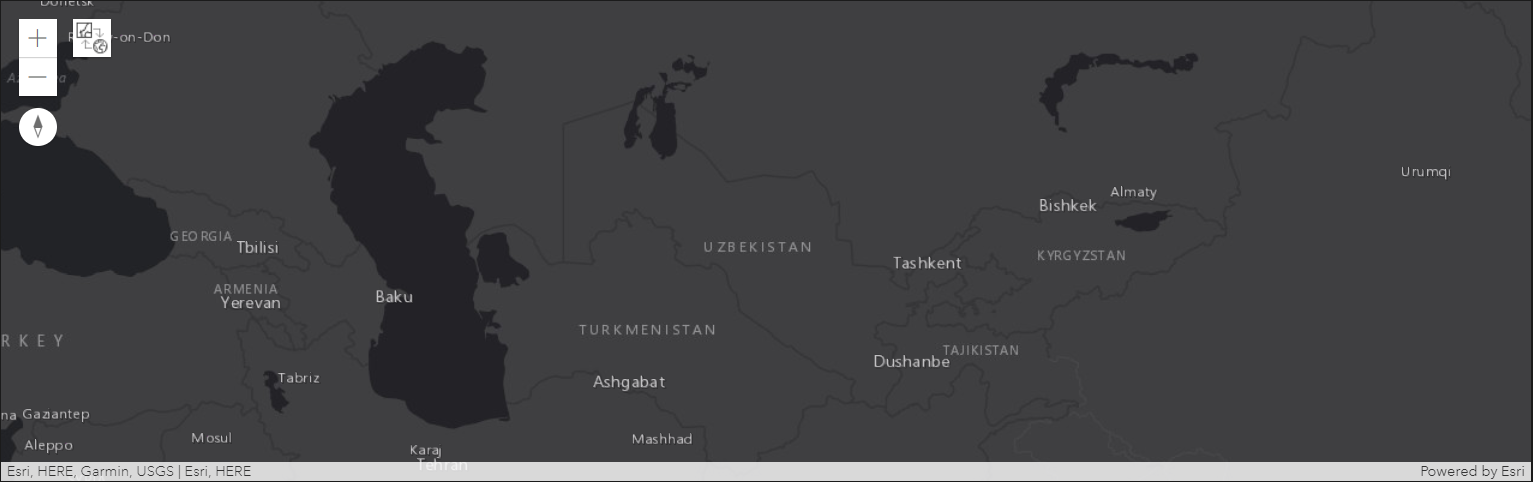

In [23]:
from IPython.display import Image
Image("abc.png")


<Item title:"AirNow Air Quality Monitoring Site Data (Current)" type:Feature Layer Collection owner:OAR_OAQPS_EPA>
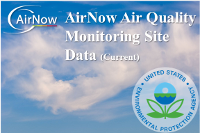

In [4]:
new_layer=gis.content.get('2d718d2733a74d1689d72b922c0ac4f4')
new_layer

In [5]:
map2.add_layer(new_layer)
map2

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

### Sample output: 

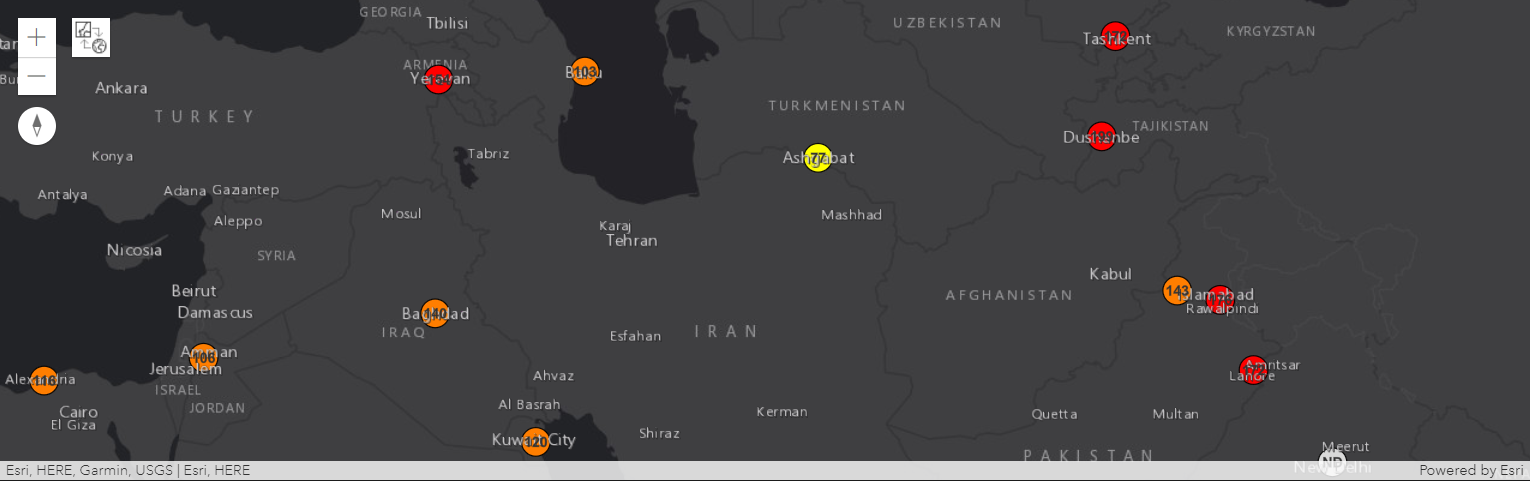

In [25]:
Image("def.png")

In [6]:
from arcgis.features import FeatureLayer
feature_layer = map2.layers[0]
feature_layer
for f in feature_layer.properties.fields:
    print(f['name'])

AQSID
CountryCode
DataSource
EPARegion
Elevation
GMTOffset
Latitude
LocalTimeString
Longitude
OZONE
OZONEPM_AQI
OZONEPM_AQI_LABEL
OZONEPM_AQI_SORT
OZONE_AQI
OZONE_AQI_LABEL
OZONE_AQI_SORT
OZONE_Measured
OZONE_Unit
PM10
PM10_AQI
PM10_AQI_LABEL
PM10_AQI_SORT
PM10_Measured
PM10_Unit
PM25
PM25_AQI
PM25_AQI_LABEL
PM25_AQI_SORT
PM25_Measured
PM25_Unit
PM_AQI
PM_AQI_LABEL
PM_AQI_SORT
ReportingArea_PipeDelimited
SiteName
StateName
Status
ObjectId


In [7]:
query_result1 = feature_layer.query(where='PM25_AQI>100 and PM25_AQI<500', as_df=True )
query_result1=query_result1[['PM25_AQI','SiteName']].sort_values(by=["PM25_AQI"])
query_result1= query_result1.reset_index(drop=True)
query_result1.index += 1
query_result1

,PM25_AQI,SiteName
1,102.0,Chisinau
2,103.0,Baku
3,105.0,Houston East C1
4,106.0,Amman
5,106.0,Highway District
6,107.0,Chokchai Police Station
7,107.0,Bishop Paiute Tribe-CA
8,111.0,Durango Complex
9,111.0,Houston North Wayside C405
10,116.0,Cairo


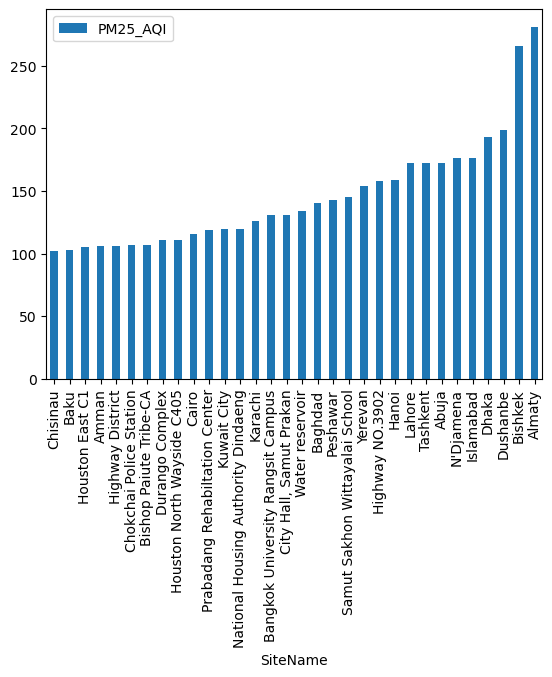

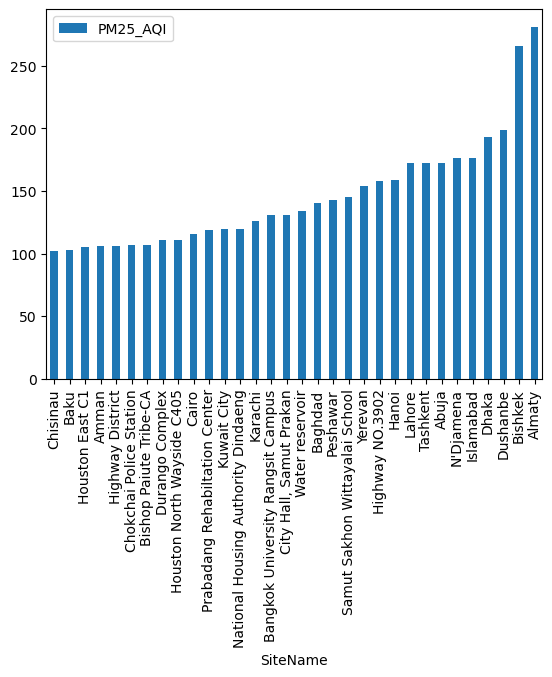

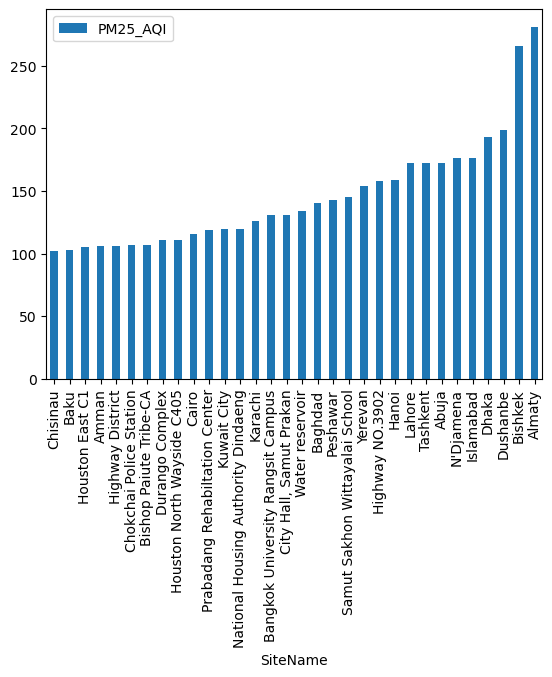

In [9]:
import matplotlib.pyplot as plt
import numpy as np


query_result1.plot('SiteName','PM25_AQI', kind='bar')
plt.show()